<a href="https://colab.research.google.com/github/amandabidah/SentimentAnalysis/blob/main/EDAProject_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Packages**

In [1]:
!pip install PySastrawi
import nltk
nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 10.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**
Data yang diimport merupakan hasil scrapping dari twitter yang diambil dalam rentang waktu 15-17 Juni 2023

In [3]:
path = 'https://raw.githubusercontent.com/amandabidah/SentimentAnalysis/main/Twitter%20Data%20-%20Prabowo.csv'
Prabowo = pd.read_csv(path)
Prabowo

,URL,Date,Tweet,ID,Replies,Retweets,Likes,Quotes,Conv. ID,Language,Links,Media,Retweeted Tweet,Bookmarks,Username
0,https://twitter.com/dikagw2/status/16702197556...,2023-06-17 23:59:55+00:00,"Gerindra manggil Prabowo sebagai ""The New Soek...",1.670220e+18,0,0,0,0,1.670220e+18,in,NaN,NaN,NaN,0,dikagw2
1,https://twitter.com/novilahamidah16/status/167...,2023-06-17 23:59:51+00:00,Prabowo siap bantu industri pertahanan jadi le...,1.670220e+18,0,0,0,0,1.670220e+18,in,NaN,NaN,NaN,0,novilahamidah16
2,https://twitter.com/muhhaslim3/status/16702197...,2023-06-17 23:59:48+00:00,"Gerindra manggil Prabowo sebagai ""The New Soek...",1.670220e+18,0,0,0,0,1.670220e+18,in,NaN,NaN,NaN,0,muhhaslim3
3,https://twitter.com/miftah_putria/status/16702...,2023-06-17 23:59:39+00:00,"Gerindra panggil Prabowo jadi ""The New Soekarn...",1.670220e+18,0,0,0,0,1.670220e+18,in,NaN,NaN,NaN,0,miftah_putria
4,https://twitter.com/kiarasyafirahh/status/1670...,2023-06-17 23:59:37+00:00,Prabowo: Industri pertahanan harus terus berke...,1.670220e+18,0,0,0,0,1.670220e+18,in,NaN,NaN,NaN,0,kiarasyafirahh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,https://twitter.com/alfisahdinardi/status/1669...,2023-06-15 10:49:02+00:00,"""China dan Indonesia harus memainkan peran yan...",1.669296e+18,1,0,0,0,1.669296e+18,in,NaN,NaN,NaN,0,alfisahdinardi
3203,https://twitter.com/alfisahdinardi/status/1669...,2023-06-15 10:49:01+00:00,Wei juga menekankan bahwa situasi saat ini di ...,1.669296e+18,1,0,0,0,1.669296e+18,in,NaN,NaN,NaN,0,alfisahdinardi
3204,https://twitter.com/alfisahdinardi/status/1669...,2023-06-15 10:49:01+00:00,"ekonomi, budaya, dan maritim, yang secara jela...",1.669296e+18,1,0,0,0,1.669296e+18,in,NaN,NaN,NaN,0,alfisahdinardi
3205,https://twitter.com/alfisahdinardi/status/1669...,2023-06-15 10:49:00+00:00,Dalam keterangan resmi Kementerian Pertahanan ...,1.669296e+18,1,0,0,0,1.669296e+18,in,NaN,NaN,NaN,0,alfisahdinardi


In [4]:
Prabowo.dtypes

URL                 object
Date                object
Tweet               object
ID                 float64
Replies              int64
Retweets             int64
Likes                int64
Quotes               int64
Conv. ID           float64
Language            object
Links               object
Media               object
Retweeted Tweet    float64
Bookmarks            int64
Username            object
dtype: object

# **Pre-Processing**

Menghapuskan kolom yang tidak dipakai

In [5]:
Prabowo = Prabowo.drop(['URL', 'Replies', 'Retweets',
                        'Likes', 'Quotes', 'Links', 'Media',
                        'ID', 'Retweeted Tweet', 'Bookmarks',
                        'Conv. ID', 'Language', 'Username',
                        'Date'], axis=1)
Prabowo.head()

,Tweet
0,"Gerindra manggil Prabowo sebagai ""The New Soek..."
1,Prabowo siap bantu industri pertahanan jadi le...
2,"Gerindra manggil Prabowo sebagai ""The New Soek..."
3,"Gerindra panggil Prabowo jadi ""The New Soekarn..."
4,Prabowo: Industri pertahanan harus terus berke...


Membuat function-function untuk preprocessing:
1. Membersihkan "Tweet" dari karakter yang tidak diinginkan seperti @, #,link, angka, RT, tanda baca, dan space kosong yang ada.
2. Mengubah "Tweet" menjadi lower case
3. Melakukan tokenisasi
4. Menyaring "Tweet" dari stopwords
5. Mengubah kata-kata pada "Tweet" menjadi kata dasarnya
6. Mengubah list menjadi kalimat
7. Menghilangkan data yang berduplikat

In [6]:
def MembersihkanText(Tweet):
    Tweet = re.sub(r'@[A-Za-z0-9]+', '', Tweet)
    Tweet = re.sub(r'#[A-Za-z0-9]+', '', Tweet)
    Tweet = re.sub(r'RT[\s]', '', Tweet)
    Tweet = re.sub(r'http\S+', '', Tweet)
    Tweet = re.sub(r'[0-9]+', '', Tweet)
    Tweet = Tweet.replace('\n', ' ')
    Tweet = Tweet.translate(str.maketrans('', '', string.punctuation))
    Tweet = Tweet.strip(' ')
    return Tweet

def LowercaseText(text):
    text = text.lower()
    return text

def TokenisasiText(text):
    text = word_tokenize(text)
    return text

def FilterText(text):
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def StemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def Kalimat(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

Prabowo['Tweet_Cleaned'] = Prabowo['Tweet'].apply(MembersihkanText)
Prabowo['Tweet_Cleaned'] = Prabowo['Tweet_Cleaned'].apply(LowercaseText)
Prabowo['Tweet_Cleaned'] = Prabowo['Tweet_Cleaned'].apply(TokenisasiText)
Prabowo['Tweet_Cleaned'] = Prabowo['Tweet_Cleaned'].apply(FilterText)
Prabowo['Tweet_Processed'] = Prabowo['Tweet_Cleaned'].apply(StemmingText)
Prabowo['Tweet_Cleaned'] = Prabowo['Tweet_Cleaned'].apply(Kalimat)

Prabowo.drop_duplicates(subset = 'Tweet', inplace = True)
NAMA_FILE_CSV = 'Prabowo_Pre-Processed.csv'
Prabowo.to_csv(NAMA_FILE_CSV, index=False)

Prabowo

,Tweet,Tweet_Cleaned,Tweet_Processed
0,"Gerindra manggil Prabowo sebagai ""The New Soek...",gerindra manggil prabowo the new soekarno habi...,"[gerindra, manggil, prabowo, the, new, soekarn..."
1,Prabowo siap bantu industri pertahanan jadi le...,prabowo bantu industri pertahanan mandiri koal...,"[prabowo, bantu, industri, tahan, mandiri, koa..."
3,"Gerindra panggil Prabowo jadi ""The New Soekarn...",gerindra panggil prabowo the new soekarno tawa...,"[gerindra, panggil, prabowo, the, new, soekarn..."
4,Prabowo: Industri pertahanan harus terus berke...,prabowo industri pertahanan berkembang koalisi...,"[prabowo, industri, tahan, kembang, koalisikeb..."
7,"Gerindra sebut Prabowo kayak ""The New Soekarno...",gerindra prabowo kayak the new soekarno garaga...,"[gerindra, prabowo, kayak, the, new, soekarno,..."
...,...,...,...
3202,"""China dan Indonesia harus memainkan peran yan...",china indonesia memainkan peran signifikan men...,"[china, indonesia, main, peran, signifikan, ja..."
3203,Wei juga menekankan bahwa situasi saat ini di ...,wei menekankan situasi kawasan asiapasifik men...,"[wei, tekan, situasi, kawasan, asiapasifik, ha..."
3204,"ekonomi, budaya, dan maritim, yang secara jela...",ekonomi budaya maritim arah bersamasama memban...,"[ekonomi, budaya, maritim, arah, bersamasama, ..."
3205,Dalam keterangan resmi Kementerian Pertahanan ...,keterangan resmi kementerian pertahanan china ...,"[terang, resmi, menteri, tahan, china, wei, me..."


In [7]:
len(Prabowo)

3002

In [8]:
lexicon_positive = dict()
# Apabila terjadi error pada saat running akibat adanya connection time runout, dimohon untuk mengupload file "lexicon_positive" dan "lexicon_negative" terlebih dahulu
import csv
with open('/content/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

def AnalisisSentimen(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    Polaritas=''
    if (score > 0):
        Polaritas = 'positive'
    elif (score < 0):
        Polaritas = 'negative'
    else:
        Polaritas = 'neutral'
    return score, Polaritas

In [9]:
results = Prabowo['Tweet_Processed'].apply(AnalisisSentimen)
results = list(zip(*results))
Prabowo['Skor_Polaritas'] = results[0]
Prabowo['Polaritas'] = results[1]
print(Prabowo['Polaritas'].value_counts())

Prabowo

positive    1402
negative    1194
neutral      406
Name: Polaritas, dtype: int64


,Tweet,Tweet_Cleaned,Tweet_Processed,Skor_Polaritas,Polaritas
0,"Gerindra manggil Prabowo sebagai ""The New Soek...",gerindra manggil prabowo the new soekarno habi...,"[gerindra, manggil, prabowo, the, new, soekarn...",0,neutral
1,Prabowo siap bantu industri pertahanan jadi le...,prabowo bantu industri pertahanan mandiri koal...,"[prabowo, bantu, industri, tahan, mandiri, koa...",5,positive
3,"Gerindra panggil Prabowo jadi ""The New Soekarn...",gerindra panggil prabowo the new soekarno tawa...,"[gerindra, panggil, prabowo, the, new, soekarn...",1,positive
4,Prabowo: Industri pertahanan harus terus berke...,prabowo industri pertahanan berkembang koalisi...,"[prabowo, industri, tahan, kembang, koalisikeb...",12,positive
7,"Gerindra sebut Prabowo kayak ""The New Soekarno...",gerindra prabowo kayak the new soekarno garaga...,"[gerindra, prabowo, kayak, the, new, soekarno,...",0,neutral
...,...,...,...,...,...
3202,"""China dan Indonesia harus memainkan peran yan...",china indonesia memainkan peran signifikan men...,"[china, indonesia, main, peran, signifikan, ja...",4,positive
3203,Wei juga menekankan bahwa situasi saat ini di ...,wei menekankan situasi kawasan asiapasifik men...,"[wei, tekan, situasi, kawasan, asiapasifik, ha...",-6,negative
3204,"ekonomi, budaya, dan maritim, yang secara jela...",ekonomi budaya maritim arah bersamasama memban...,"[ekonomi, budaya, maritim, arah, bersamasama, ...",-4,negative
3205,Dalam keterangan resmi Kementerian Pertahanan ...,keterangan resmi kementerian pertahanan china ...,"[terang, resmi, menteri, tahan, china, wei, me...",-3,negative


# **Visualisasi Data**

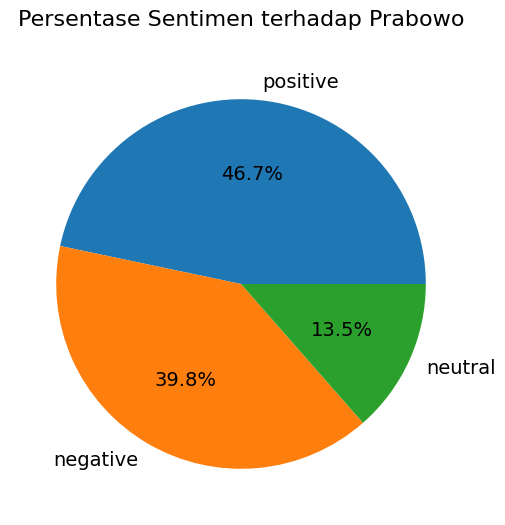

In [10]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in Prabowo['Polaritas'].value_counts()]
labels = list(Prabowo['Polaritas'].value_counts().index)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Persentase Sentimen terhadap Prabowo', fontsize = 16, pad = 20)
plt.show()

In [11]:
WordcloudPrabowo = Prabowo['Tweet_Cleaned'].copy()

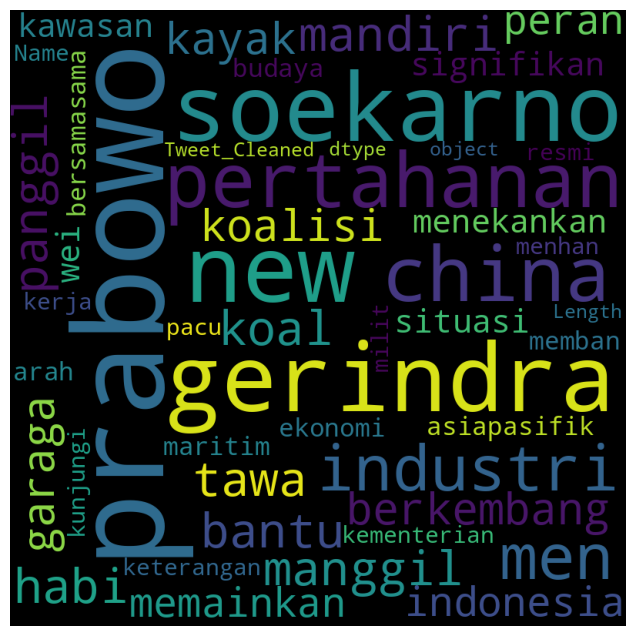

In [12]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(WordcloudPrabowo))
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Didapat kata-kata yang paling sering muncul di tweet mengenai prabowo

<Axes: xlabel='Skor_Polaritas'>

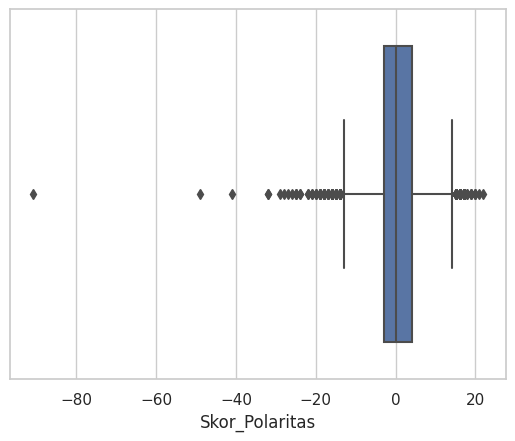

In [13]:
sns.set(style="whitegrid")
sns.boxplot(x=Prabowo['Skor_Polaritas'])